In [1]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/kidney_disease.csv')
print(myData.shape)

(400, 26)


In [2]:
peek = myData.head(10)
print(peek)

   id   age     bp     sg   al   su       rbc        pc         pcc  \
0   0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1   1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2   2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3   3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4   4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5   5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6   6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7   7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8   8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9   9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   

           ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
0  notpresent  ...   44   7800  5.2  yes  yes   no  good   no   no   
1  notpresent  ...   38   6000  NaN   no   no   no  good   no   no   
2  notpr

In [3]:
shape = myData.shape
print(shape)

(400, 26)


In [4]:
types = myData.dtypes
print(types)

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [5]:
outcome_counts = myData.groupby('classification').size()
print(outcome_counts)

classification
ckd       248
ckd\t       2
notckd    150
dtype: int64


In [6]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

         id    age     bp     sg     al     su    bgr     bu     sc    sod    pot   hemo
id    1.000 -0.185 -0.246  0.642 -0.542 -0.283 -0.339 -0.307 -0.269  0.364 -0.092  0.640
age  -0.185  1.000  0.159 -0.191  0.122  0.221  0.245  0.197  0.133 -0.100  0.058 -0.193
bp   -0.246  0.159  1.000 -0.219  0.161  0.223  0.160  0.189  0.146 -0.116  0.075 -0.307
sg    0.642 -0.191 -0.219  1.000 -0.470 -0.296 -0.375 -0.314 -0.361  0.412 -0.073  0.603
al   -0.542  0.122  0.161 -0.470  1.000  0.269  0.379  0.454  0.399 -0.460  0.129 -0.635
su   -0.283  0.221  0.223 -0.296  0.269  1.000  0.718  0.169  0.223 -0.132  0.219 -0.225
bgr  -0.339  0.245  0.160 -0.375  0.379  0.718  1.000  0.143  0.115 -0.268  0.067 -0.306
bu   -0.307  0.197  0.189 -0.314  0.454  0.169  0.143  1.000  0.586 -0.323  0.357 -0.610
sc   -0.269  0.133  0.146 -0.361  0.399  0.223  0.115  0.586  1.000 -0.690  0.326 -0.402
sod   0.364 -0.100 -0.116  0.412 -0.460 -0.132 -0.268 -0.323 -0.690  1.000  0.098  0.365
pot  -0.092  0.058  0

<AxesSubplot:ylabel='Frequency'>

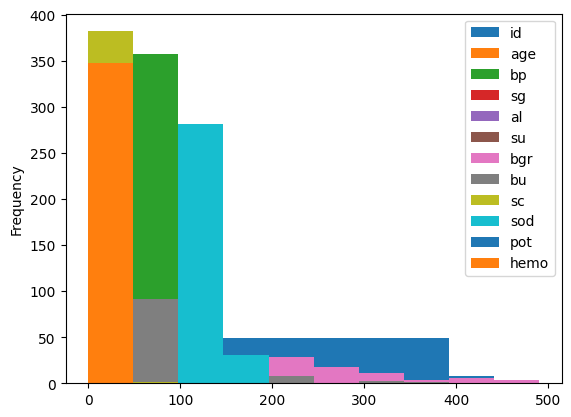

In [7]:
import matplotlib.pyplot as plt
myData.plot.hist()

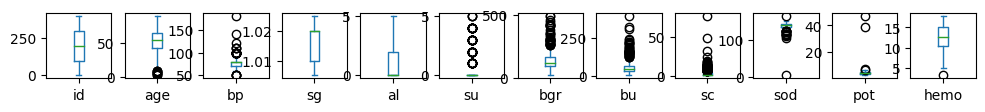

In [14]:
myData.plot(kind='box', subplots=True, layout=(12,12), sharex=False, sharey=False, figsize = (12,12))
plt.show()

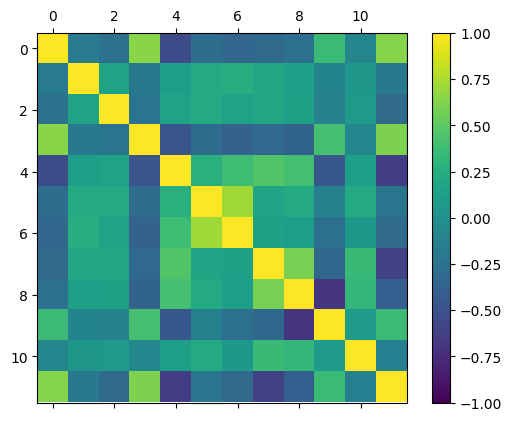

In [15]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [54]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [55]:
X = myData.drop('classification', axis=1).values
Y = myData['classification'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.101 0.345 0.5   0.25  0.25  0.    0.    1.    0.    0.    0.122 0.652
  0.441 0.652 0.02  0.327 0.111 0.766 0.178 0.    0.5   0.    0.    0.
  0.   ]
 [0.104 0.571 0.5   0.25  0.75  0.    0.    0.    0.    0.    0.395 0.246
  0.25  0.652 0.052 0.449 0.222 1.    1.    0.5   0.5   0.    0.5   0.5
  0.   ]
 [0.106 0.571 0.5   0.75  0.75  0.    1.    0.    0.    0.    0.397 0.285
  0.233 0.565 0.054 0.422 1.    1.    1.    0.5   0.5   0.    0.5   0.5
  0.   ]
 [0.109 0.5   0.333 0.5   0.    0.    1.    0.5   0.    0.    0.218 0.073
  0.034 0.826 0.038 0.633 0.472 0.584 0.556 0.    0.5   0.    0.    0.
  0.   ]
 [0.114 0.798 0.333 0.    0.    0.    0.5   0.5   0.    0.    0.103 0.099
  0.021 0.457 0.034 0.469 0.25  0.325 0.267 0.5   0.5   0.    0.    0.5
  0.   ]]


In [56]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('classification', axis=1).values
mydata_label = myData['classification'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[0.154 0.125 0.286 0.004 0.004 0.    0.    0.007 0.    0.    0.282 0.722
  0.039 0.479 0.012 0.028 0.014 0.211 0.029 0.    0.004 0.    0.    0.
  0.   ]
 [0.15  0.184 0.273 0.003 0.01  0.    0.    0.    0.    0.    0.705 0.262
  0.021 0.456 0.016 0.033 0.027 0.262 0.153 0.003 0.003 0.    0.003 0.003
  0.   ]
 [0.151 0.181 0.268 0.003 0.01  0.    0.007 0.    0.    0.    0.698 0.299
  0.02  0.436 0.016 0.031 0.121 0.258 0.151 0.003 0.003 0.    0.003 0.003
  0.   ]
 [0.209 0.218 0.318 0.005 0.    0.    0.009 0.005 0.    0.    0.563 0.109
  0.005 0.644 0.019 0.056 0.077 0.204 0.113 0.    0.005 0.    0.    0.
  0.   ]
 [0.256 0.39  0.374 0.005 0.    0.    0.005 0.005 0.    0.    0.374 0.171
  0.005 0.668 0.021 0.053 0.048 0.134 0.064 0.005 0.005 0.    0.    0.005
  0.   ]]


In [57]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
  1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
  0.]
 [1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
  0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
  1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  0.]]


In [61]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('classification', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('classification', axis=1).values
mydata_label = myData['classification'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[644.196  28.976  34.458 299.005 260.738  52.745   4.006  52.457  17.599
   7.319  70.054  85.887  92.146  89.56    1.523 424.34  224.833   0.918
  51.033 189.544 141.241  13.386  54.382  49.36   29.983]


In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False False False  True False False  True False False False False False
 False False False False False False False  True False False  True False
 False]
Feature Ranking: [17 18 16  1  3 11  1  9  8  5 21 20 22 15 12  7 13 19 14  1  4 10  1  2
  6]


In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.67  0.211 0.072]
[[-9.290e-01  4.054e-02  2.972e-02 -3.182e-05  7.098e-03  3.300e-03
   5.575e-04 -1.393e-03  7.399e-04  3.108e-04  3.177e-01  1.686e-01
   1.294e-02 -2.906e-02  2.202e-03 -1.669e-02 -4.744e-02 -2.747e-03
  -3.858e-02  2.612e-03  2.379e-03  7.175e-04  1.375e-03  1.203e-03
   8.183e-04]
 [ 3.303e-01  4.050e-02  7.443e-03 -5.352e-06  2.921e-03  9.153e-03
  -9.761e-04 -8.060e-04  3.235e-04  2.196e-04  9.423e-01  3.177e-02
  -1.724e-03 -3.939e-03  1.309e-03  2.409e-04  7.532e-04  8.826e-03
  -4.523e-03  1.227e-03  1.762e-03  1.092e-03  2.001e-04  1.568e-07
  -1.548e-04]
 [ 1.573e-01  1.015e-02  4.121e-02 -2.272e-05  1.144e-02 -4.604e-04
  -4.520e-03 -3.244e-03  1.049e-03  4.824e-04 -8.868e-02  9.714e-01
   4.862e-02 -3.945e-02  1.426e-02 -2.567e-02 -4.907e-02 -5.925e-02
  -1.052e-01  1.758e-03  1.246e-03  4.211e-04  1.946e-03  2.950e-03
   3.645e-03]]


In [64]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(228, 3)


In [65]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(228, 5)


In [68]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier


myData['num'] = pd.cut(myData['classification'], bins=3, labels=[0, 1, 2])
mydata_label = myData['classification'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.169 0.003 0.019 0.092 0.13  0.03  0.052 0.02  0.003 0.001 0.022 0.018
 0.042 0.015 0.002 0.103 0.05  0.002 0.022 0.111 0.069 0.004 0.008 0.012
 0.004]
